In [1]:
# %pip install qiskit pylatexenc

In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.quantum_info import Statevector, Operator

import numpy as np

Let $f : \mathbb{F}_2^n \rightarrow \mathbb{F}_2^d$ be given as follows: $n = d = 3$ and

$\begin{array}{rlrlrlrl} f(0, 0, 0) &= \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} & f(1, 0, 0) &= \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} & f(0, 1, 0) &= \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} & f(1, 1, 0) &= \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \\ f(0, 0, 1) &= \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} & f(1, 0, 1) &= \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} & f(0, 1, 1) &= \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} & f(1, 1, 1) &= \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} \end{array}$.

Create a QROM for $f$. Recall, $U_f | x \rangle_n | 0 \rangle_d = | x \rangle_n | f(x) \rangle_d$.

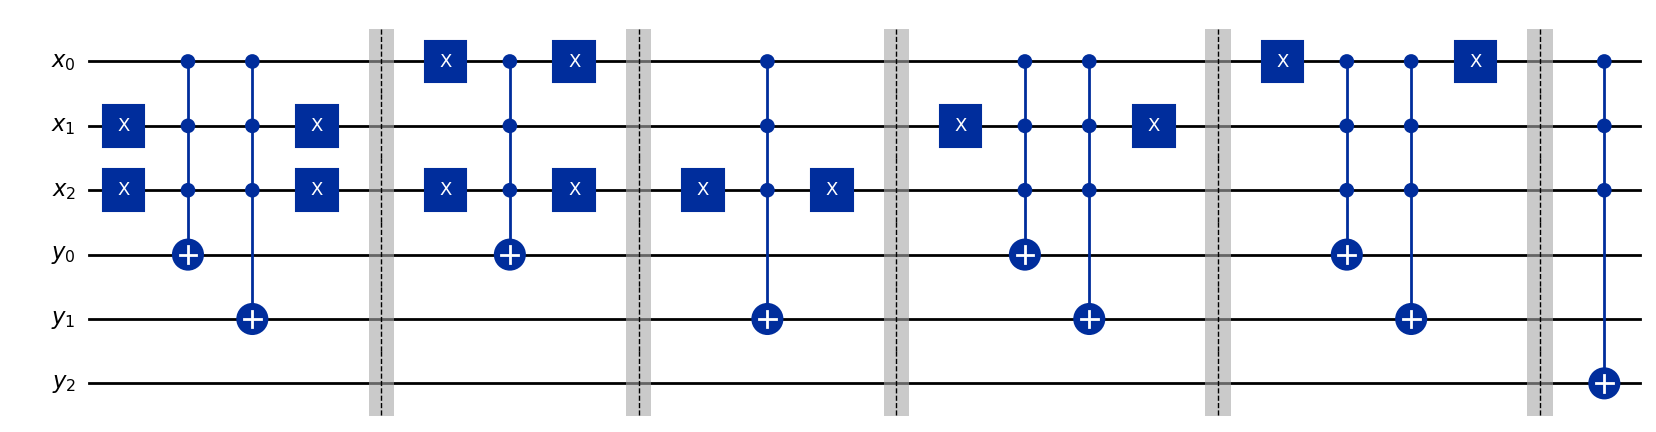

In [3]:
n = d = 3

quantum_keys = QuantumRegister(size=n, name="x")
quantum_values = AncillaRegister(size=d, name="y")

select_qrom = QuantumCircuit(quantum_keys, quantum_values, name=r"$U_f$")

# f(1, 0, 0) = (1, 1, 0)
select_qrom.x(quantum_keys[1])
select_qrom.x(quantum_keys[2])
select_qrom.mcx(quantum_keys, quantum_values[0])
select_qrom.mcx(quantum_keys, quantum_values[1])
select_qrom.x(quantum_keys[1])
select_qrom.x(quantum_keys[2])

select_qrom.barrier()

# f(0, 1, 0) = (1, 0, 0)
select_qrom.x(quantum_keys[0])
select_qrom.x(quantum_keys[2])
select_qrom.mcx(quantum_keys, quantum_values[0])
select_qrom.x(quantum_keys[0])
select_qrom.x(quantum_keys[2])

select_qrom.barrier()

# f(1, 1, 0) = (0, 1, 0)
select_qrom.x(quantum_keys[2])
select_qrom.mcx(quantum_keys, quantum_values[1])
select_qrom.x(quantum_keys[2])

select_qrom.barrier()

# f(1, 0, 1) = (1, 1, 0)
select_qrom.x(quantum_keys[1])
select_qrom.mcx(quantum_keys, quantum_values[0])
select_qrom.mcx(quantum_keys, quantum_values[1])
select_qrom.x(quantum_keys[1])

select_qrom.barrier()

# f(0, 1, 1) = (1, 1, 0)
select_qrom.x(quantum_keys[0])
select_qrom.mcx(quantum_keys, quantum_values[0])
select_qrom.mcx(quantum_keys, quantum_values[1])
select_qrom.x(quantum_keys[0])

select_qrom.barrier()

# f(1, 1, 1) = (0, 0, 1)
select_qrom.mcx(quantum_keys, quantum_values[2])

select_qrom.draw(output="mpl")

## side note: any sort of structure/pattern in the data can usually be used to make the circuit more efficient:

Verify that

$f (x_0, x_1, x_2) = \begin{pmatrix} x_0 \oplus x_1 \\ x_0 \oplus \left( x_1 x_2 \right) \\ x_0 x_1 x_2 \end{pmatrix}$.

Can you use this to construct a more efficient QROM?

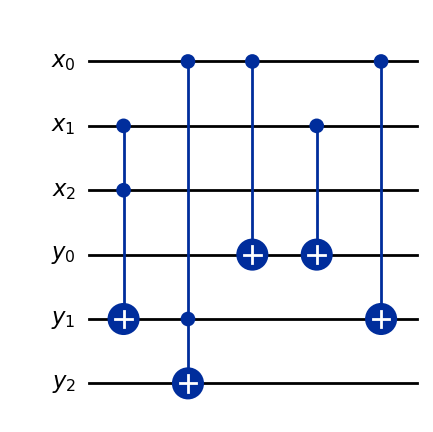

In [4]:
n = d = 3

quantum_keys = QuantumRegister(size=n, name="x")
quantum_values = AncillaRegister(size=d, name="y")

select_qrom = QuantumCircuit(quantum_keys, quantum_values, name=r"$U_f$")

select_qrom.ccx(quantum_keys[1], quantum_keys[2], quantum_values[1])
select_qrom.ccx(quantum_keys[0], quantum_values[1], quantum_values[2])
select_qrom.cx(quantum_keys[0], quantum_values[0])
select_qrom.cx(quantum_keys[1], quantum_values[0])
select_qrom.cx(quantum_keys[0], quantum_values[1])

select_qrom.draw(output="mpl")

### What is the action of this QROM?

Answer:
\begin{equation}
    U_f | x_0, x_1, x_2 \rangle | y_0, y_1, y_2 \rangle = | x_0 x_1 x_2 \rangle | y_0 \oplus x_0 \oplus x_1, y_1 \oplus \left( x_1 x_2 \right) \oplus x_0, y_3 \oplus y_1 \oplus \left( x_1 x_2 \right) \rangle \neq | x \rangle_3 | y \oplus f(x) \rangle_3.
\end{equation}

### Let's now do the same function but with SWAPs.

We need $n + d 2^n = 27$ qubits.

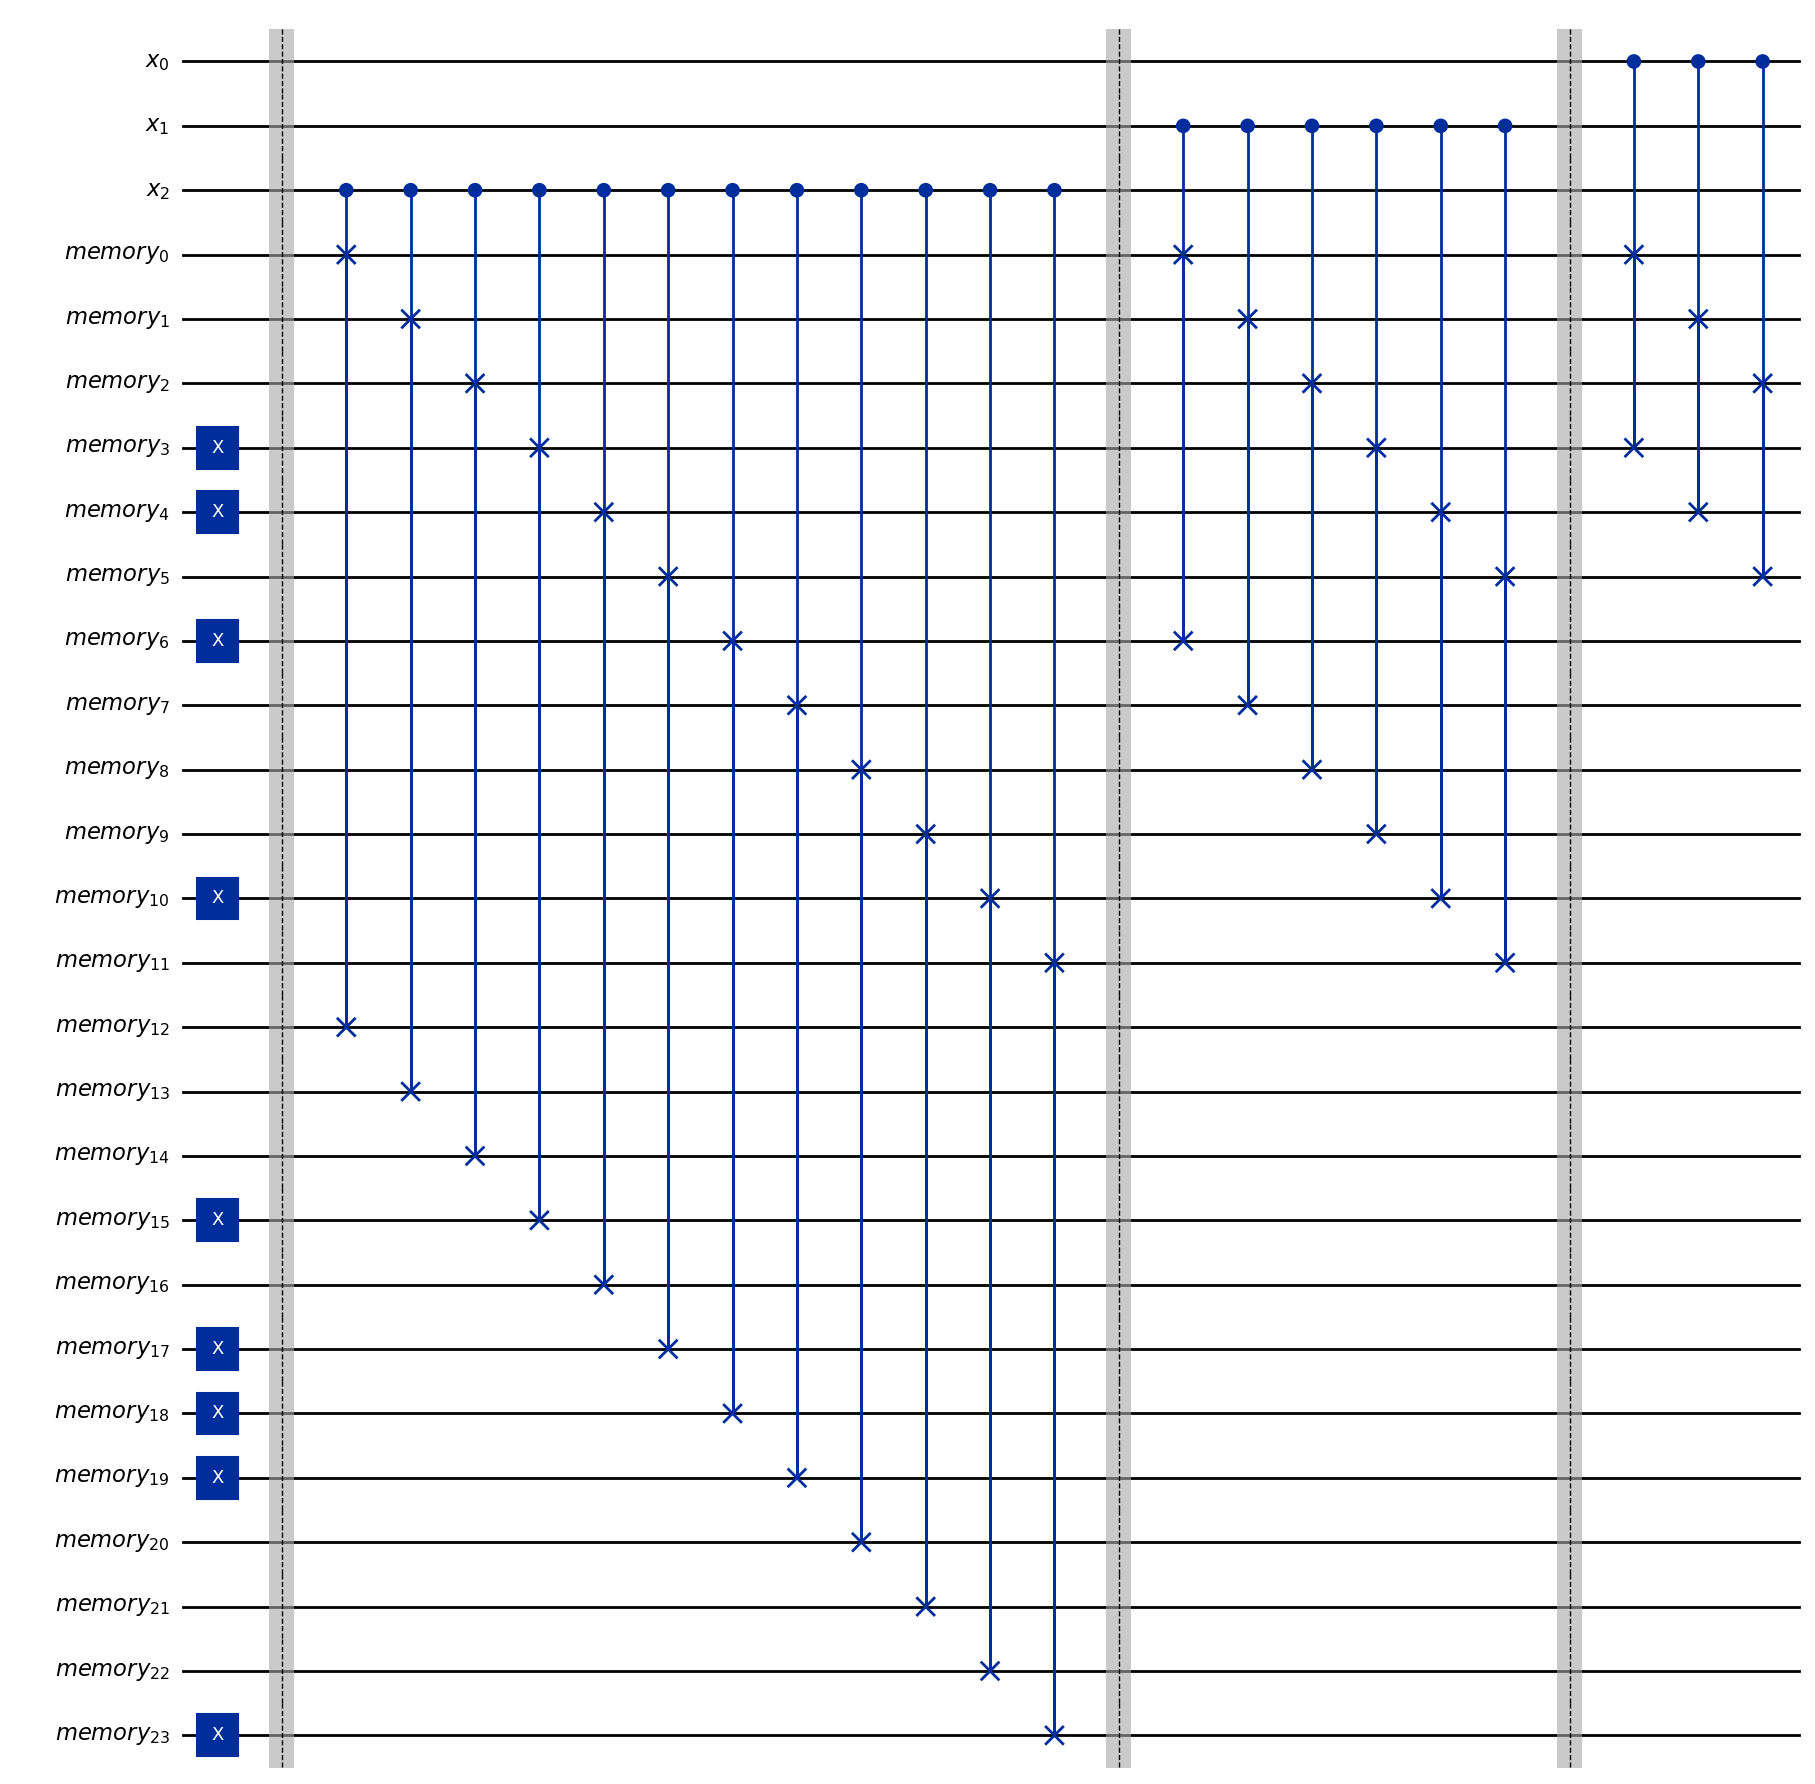

In [ ]:
quantum_register = QuantumRegister(size=n, name="x")
ancilla_register = AncillaRegister(size=d * (2**n), name="memory")

swap_qram = QuantumCircuit(quantum_register, ancilla_register, name="SWAP QRAM")

# f(1, 0, 0) = (1, 1, 0)
swap_qram.x(ancilla_register[1 * d + 0])
swap_qram.x(ancilla_register[1 * d + 1])

# f(0, 1, 0) = (1, 0, 0)
swap_qram.x(ancilla_register[2 * d + 0])

# f(1, 1, 0) = (0, 1, 0)
swap_qram.x(ancilla_register[3 * d + 1])

# f(1, 0, 1) = (1, 1, 0)
swap_qram.x(ancilla_register[5 * d + 0])
swap_qram.x(ancilla_register[5 * d + 2])

# f(0, 1, 1) = (1, 1, 0)
swap_qram.x(ancilla_register[6 * d + 0])
swap_qram.x(ancilla_register[6 * d + 1])

# f(1, 1, 1) = (0, 0, 1)
swap_qram.x(ancilla_register[7 * d + 2])

###

for i in range(n - 1, - 1, - 1):
    jump = d * (2**i)
    swap_qram.barrier()
    for j in range(jump):
        swap_qram.cswap(quantum_register[i], ancilla_register[j], ancilla_register[j + jump])

swap_qram.draw(output="mpl")

# Select-SWAP, with $k = 1$:

Now $f_1 : \mathbb{F}_2^{3 - 1} \rightarrow \mathbb{F}_2^{3 \cdot 2^1}$, with
\begin{equation}
    f(x_0, x_1) = \left( \begin{pmatrix} x_0 \oplus x_1 \\ x_0 \\ 0 \end{pmatrix}_{(x_2 = 0)}, \begin{pmatrix} x_0 \oplus x_1 \\ x_0 \oplus x_1 \\ x_0 x_1 \end{pmatrix}_{(x_2 = 1)} \right).
\end{equation}
Equivalently,
$\begin{array}{rlrlrlrl} f(0, 0) &= (0, 0, 0, 0, 0, 0) & f(1, 0) &= (1, 1, 0, 1, 1, 0) & f(0, 1) &= (1, 0, 0, 1, 1, 0) & f(1, 1) &= (0, 1, 0, 0, 0, 1). \end{array}$

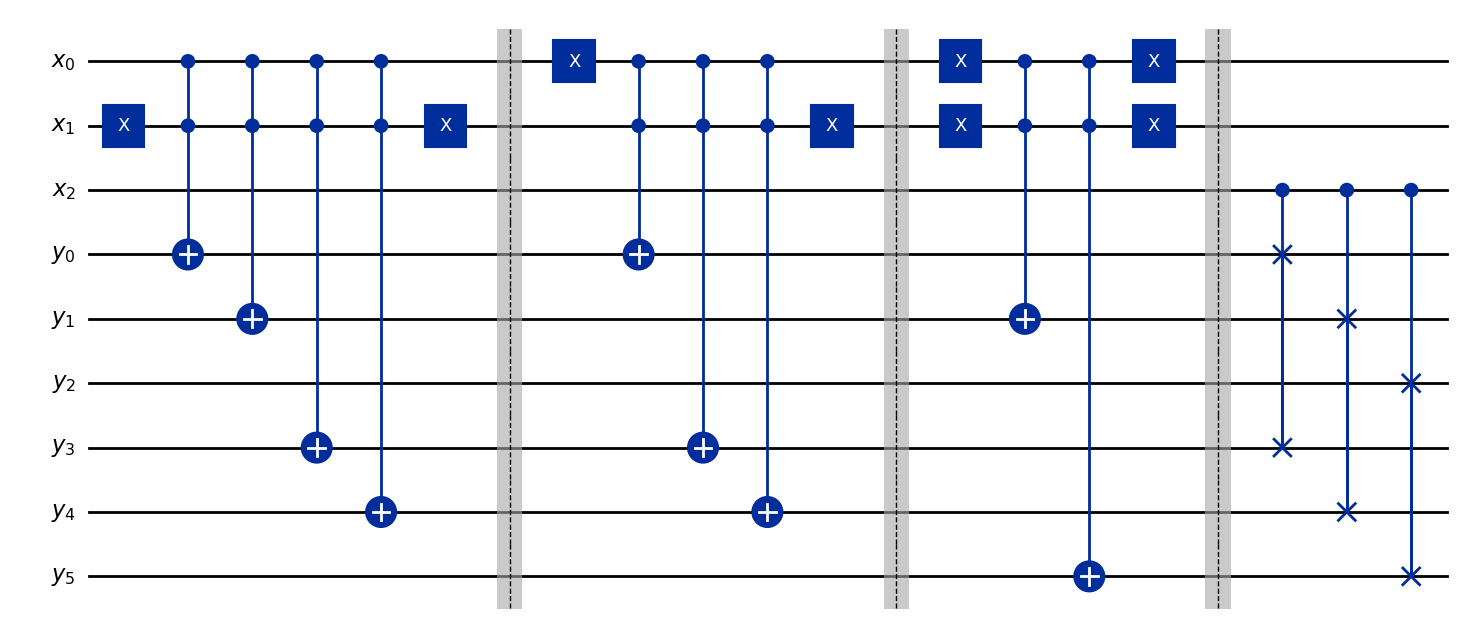

In [6]:
quantum_keys = QuantumRegister(size=n, name="x")
quantum_values = AncillaRegister(size=d * 2, name="y")

select_swap_qrom = QuantumCircuit(quantum_keys, quantum_values, name=r"$U_f$")

# f(1, 0) = (1, 1, 0, 1, 1, 0)
select_swap_qrom.x(quantum_keys[1])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[0])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[1])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[3])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[4])
select_swap_qrom.x(quantum_keys[1])

select_swap_qrom.barrier()

# f(0, 1) = (1, 0, 0, 1, 1, 0)
select_swap_qrom.x(quantum_keys[0])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[0])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[3])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[4])
select_swap_qrom.x(quantum_keys[1])

select_swap_qrom.barrier()

# f(1, 1) = (0, 1, 0, 0, 0, 1)
select_swap_qrom.x(quantum_keys[0])
select_swap_qrom.x(quantum_keys[1])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[1])
select_swap_qrom.mcx(quantum_keys[:2], quantum_values[5])
select_swap_qrom.x(quantum_keys[0])
select_swap_qrom.x(quantum_keys[1])

select_swap_qrom.barrier()

jump = d
for j in range(jump):
    select_swap_qrom.cswap(quantum_keys[2], quantum_values[j], quantum_values[j + jump])

select_swap_qrom.draw(output="mpl")

## construct the corresponding diagonal unitary

QROM to compute values -> P(1) on value qubits -> QROM inverse to uncompute values

In [7]:
qrom = select_swap_qrom # can recplace this we any other QROM/QRAM circuit, for example, swap_qram or select_swap_qrom

### this next step is not necessary here, but could be useful to know:

circuits can be turned into gates with the '.to_gate()' method

however, barriers cause an error! the following removes all barriers and returns the gate

In [8]:
from qiskit.transpiler.passes import RemoveBarriers
from qiskit.transpiler import PassManager

pm = PassManager(RemoveBarriers())
qrom_gate = pm.run(qrom).to_gate()

### we also need to invert, if the circuit is not involutive

(note: annotation is not necessary here either, but can be a good practice in more complicated circuits. it keeps more "metadata" about the origin of the circuit)

In [9]:
qrom_gate_inverse = qrom_gate.inverse(annotated=True)

### let's put the diagonal unitary together

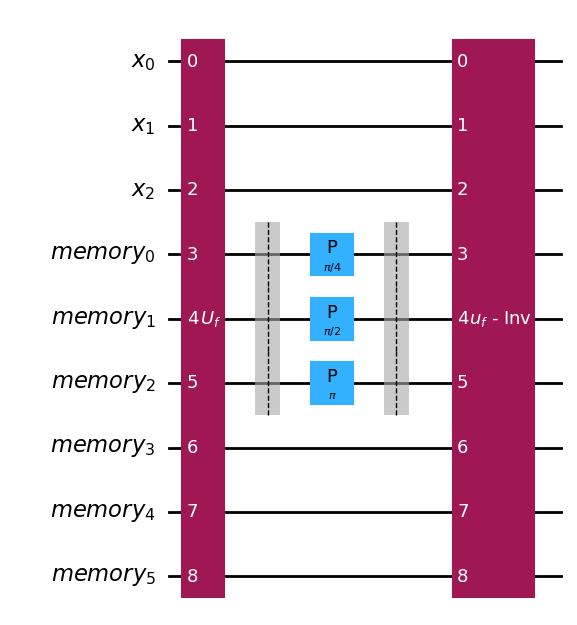

In [10]:
main_register = QuantumRegister(size=n, name="x")
ancillas = AncillaRegister(size=qrom.num_ancillas, name="memory")

diagonal_unitary = QuantumCircuit(main_register, ancillas, name="D_f")

diagonal_unitary.compose(qrom_gate, inplace=True)

# P(1)
diagonal_unitary.barrier(ancillas[:d])
for idx, q in enumerate(reversed(ancillas[:d])):
    diagonal_unitary.p(np.pi / (1 << idx), q)
diagonal_unitary.barrier(ancillas[:d])

diagonal_unitary.compose(qrom_gate_inverse, inplace=True)

diagonal_unitary.draw(output="mpl")

### verify

In [11]:
# numerical values corresponding the bitstrings
f_values = np.array([0, 3, 1, 2, 0, 3, 3, 4])
# phases defined by f
phases = np.exp(2 * np.pi * 1j * f_values / (1 << d))
phases

array([ 1.00000000e+00+0.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
        7.07106781e-01+7.07106781e-01j,  6.12323400e-17+1.00000000e+00j,
        1.00000000e+00+0.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
       -7.07106781e-01+7.07106781e-01j, -1.00000000e+00+1.22464680e-16j])

## extract the operator of the circuit

### we only care about states where the ancillas are all zero

In [12]:
D = Operator(diagonal_unitary).data[:1 << n, :1 << n] # only keep the first 2^n rows and columns
diagonal = np.diag(D)

### first, let's check if D is indeed diagonal

In [13]:
if np.array_equal(D, np.diag(diagonal)):
    print("yay!")
else:
    print("boo!")

yay!


### finally, check is the phases are correct

In [14]:
if np.array_equal(diagonal, phases):
    print("yay!")
else:
    print("boo!")

yay!
